#Table of Contents
* [QSB Project](#QSB-Project)
	* [Import modules](#Import-modules)
	* [Load raw data](#Load-raw-data)
		* [Question 1](#Question-1)
	* [Define functions to fit](#Define-functions-to-fit)
	* [Fit data to functions](#Fit-data-to-functions)
		* [Model definition with PySB](#Model-definition-with-PySB)
	* [Simulate perturbations in the rates](#Simulate-perturbations-in-the-rates)


#QSB Project

##Import modules

In [1]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve
import pandas as pd
from IPython.display import HTML

##Load raw data

In [4]:
raw_data = pd.DataFrame.from_csv('EC-RP_IMS-RP_IC-RP_data_for_models.csv')
raw_data.index.name = raw_data.index.name.replace('# ','')
time = raw_data.index.values
IC_RP = raw_data['norm_IC-RP']
IMS_RP = raw_data['IMS-RP step']
EC_RP = raw_data['norm_EC-RP']

In [126]:
raw_data

,IC-RP,norm_IC-RP,nrm_var_IC-RP,IMS-RP,IMS-RP step,VAR,EC-RP,norm_EC-RP,nrm_var_EC-RP
Time,,,,,,,,,
180,0.7063,0.0000,0.0006,0,0,1,0.4451,0.0020,0.0003
360,0.7063,0.0000,0.0006,0,0,1,0.4460,0.0018,0.0003
540,0.7063,0.0000,0.0006,0,0,1,0.4459,0.0015,0.0003
720,0.7063,0.0000,0.0006,0,0,1,0.4458,0.0051,0.0003
900,0.7063,0.0000,0.0006,0,0,1,0.4474,0.0038,0.0002
1080,0.7063,0.0000,0.0006,0,0,1,0.4468,0.0042,0.0002
1260,0.7063,0.0000,0.0006,0,0,1,0.4470,0.0057,0.0003
1440,0.7063,0.0000,0.0006,0,0,1,0.4477,0.0022,0.0004
1620,0.7063,0.0000,0.0006,0,0,1,0.4461,0.0027,0.0004


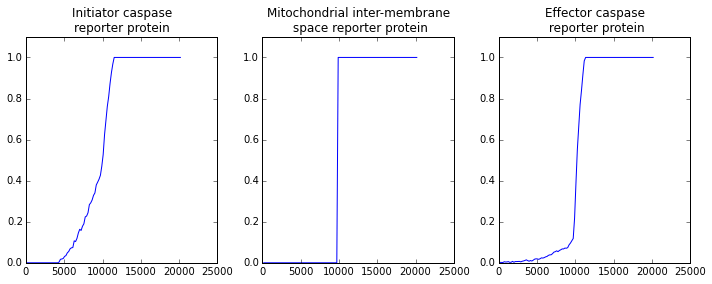

In [5]:
fig = plt.figure(figsize=(10,4))

ic_ax = fig.add_subplot(131)
ic_ax.plot(time,IC_RP)
ic_ax.set_ylim((0,1.1))
ic_ax.set_title("Initiator caspase \nreporter protein")

ims_ax = fig.add_subplot(132)
ims_ax.plot(time,IMS_RP)
ims_ax.set_ylim((0,1.1))
ims_ax.set_title("Mitochondrial inter-membrane\n space reporter protein")

ec_ax = fig.add_subplot(133)
ec_ax.plot(time,EC_RP)
ec_ax.set_ylim((0,1.1))
ec_ax.set_title("Effector caspase\n reporter protein")
fig.tight_layout()

##Define functions to fit

In [47]:
#We have to define the functions that we want to fit

def linea(x,a,b):
    return a*x+b


def expon(x,a,b,c):
    return a*np.exp(b*x)+c
    
    
def poli(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

##Fit data to functions

In [138]:
to_be_fitted = IC_RP
# to_be_fitted = IMS_RP
# to_be_fitted =  EC_RP


In [139]:
poptl, pcovl = curve_fit(linea,time,to_be_fitted)
poptp, pcovp = curve_fit(poli,time,to_be_fitted)
poptex, pcovex = curve_fit(expon,time,to_be_fitted, p0=(0.1, 1e-4,10))
 
linea_fit = linea(time,*poptl)
poli_fit = poli(time,*poptp)
expo_fit = expon(time,*poptex)

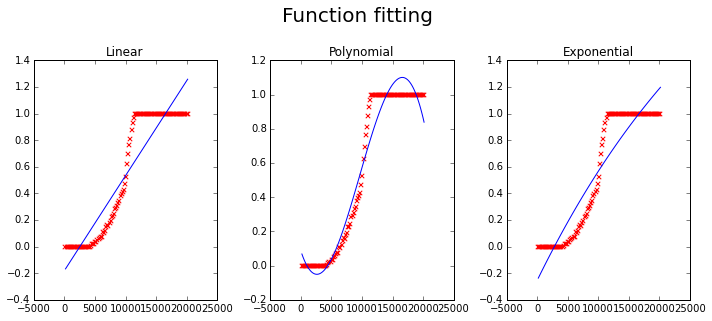

In [140]:
fig = plt.figure(figsize=(10,4))

line_ax = fig.add_subplot(131)
line_ax.plot(time,linea_fit)
line_ax.scatter(time,to_be_fitted,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(132)
poly_ax.plot(time,poli_fit)
poly_ax.scatter(time,to_be_fitted,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(133)
exp_ax.plot(time,expo_fit)
exp_ax.scatter(time,to_be_fitted,c='r',marker='x')
exp_ax.set_title("Exponential")

fig.suptitle("Function fitting\n\n",y=1.1,fontsize=20)

fig.tight_layout()

###Model definition with PySB

In [174]:
import qsb_model as m

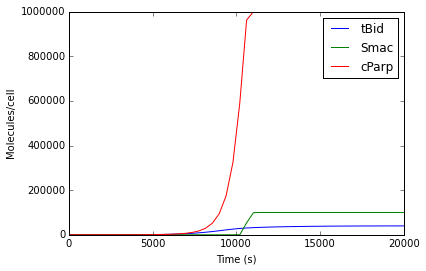

In [26]:
t = pl.linspace(0, 20000)
yout = odesolve(m.model, t)
plt.plot(t, yout['mBid'], label="tBid")
plt.plot(t, yout['aSmac'], label='Smac')
plt.plot(t, yout['cPARP'], label='cParp')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Molecules/cell")


In [214]:
from scipy.spatial.distance import pdist

##Sensitivity analysis
In this section, the importance of each parameter will be assessed.  
In this analysis, the output (on idividual molecules) of the original model will be compared with the output of a model where one parameter has been changed

###Distance and statistics
Since the parameter space is the same in both the experiment (modified model) and the control (model fitted from experiments), an euclidean distance was chosen as a measure of distance.  
It has to be noted, that the euclidean distance is susceptible to complementary fluctuations, as seen below

In [226]:
pdist([[3,2,3],[1,2,3]])

array([ 2.])

In [228]:
pdist([[3,2,3],[3,4,3]])

array([ 2.])

As a significance measure, the Mann-Whitney U test was chosen because it can work with zero-values in the null distribution, and behaves better with non-normal distributions

In [230]:
HTML("<iframe src='http://en.wikipedia.org/wiki/Mann-Whitney_U_test' width='800' height='600' style='border:0'></iframe>")

In [64]:
# Extract initial conditions (We are not going to change these
initial_conditions = [x[1] for x in m.model.initial_conditions]
# Filter out initial concentrations from the parameters that we are going to use
params_to_change = [param for param in m.model.parameters if not param in initial_conditions]

In [258]:
meh.args[0]

'synthesize_C8_k'

In [283]:
import qsb_model as m
def messed_up_param(model,param,out_var,order_magnitude,samples):
    '''
    Measure the extent at which modifying a parameter of a model
    will change the production of a molecule specified by it
    input: 
    model: pysb model
    param: parameter to be evaluated
    out_var: output molecule to me measured
    order_magnitude: The parameter will be modified X orders of 
    magnitude below and above its experimentally fitted value
    samples: samples to be generated
    '''
    # set integration interval
    t = np.linspace(0,200000)
    # Store original parameter value
    old_param_value = param.value
    # The parameter will be modified _samples_ times
    # _order_magnitude_ orders of magnitude
    value_list = np.linspace(old_param_value * 10**-order_magnitude, old_param_value * 10**order_magnitude,samples)
    # Solve the ODE system for the original model
    yout_old = odesolve(model.model, t)
    # Extract output variable to be analyzed
    analyte = yout_old[out_var]
    print("Parameter {} will be scanned for deviations of {} production ({} samples)".format(param.args[0],
                                                                                             out_var,samples))
    sample_output = {}
    for value in value_list:
        # Reset model
        model.model.reset_equations()
        # Set the parameter to the new value
        param.value = value
        # Solve the ODE
        yout = odesolve(model.model,t)
        # Extract the values of the analyte that is being compared
        new_analyte = yout[out_var]
        # Calculate a U-test to see if the two distributions
        # are significantly different
        u_test = stats.mannwhitneyu(new_analyte,analyte)
        # Measure the euclidean distance between the sample and the original model
        euclidean = pdist([new_analyte,analyte])
        # Reset model
        param.value = old_param_value
        model.model.reset_equations()
        sample_output[value] = [euclidean[0],u_test[0]]
        sample_output_table = pd.DataFrame.from_dict(sample_output,orient='index')
        sample_output_table.columns=['euclidean','u_test_Pval']
        sample_output_table.index.name = param.args[0]
#         print "euclidean distance: {}, P-value (U-test): {}".format(np.round(euclidean[0],2),u_test[1])
    return sample_output_table

In [292]:
perturbations = {}
for output in ['mBid','aSmac','cPARP']:
    perturbations[output] = [messed_up_param(m,params,output,2,10) for params in params_to_change]
    print('\n')

Parameter synthesize_C8_k will be scanned for deviations of mBid production (10 samples)
Parameter bind_C8_Bidn_to_C8Bidn_kf will be scanned for deviations of mBid production (10 samples)
Parameter bind_C8_Bidn_to_C8Bidn_kr will be scanned for deviations of mBid production (10 samples)
Parameter catalyze_C8Bidn_to_C8_Bidt_kc will be scanned for deviations of mBid production (10 samples)
Parameter bind_Bidt_Baxd_to_BidtBaxd_kf will be scanned for deviations of mBid production (10 samples)
Parameter bind_Bidt_Baxd_to_BidtBaxd_kr will be scanned for deviations of mBid production (10 samples)
Parameter catalyze_BidtBaxd_to_Bidt_Baxa_kc will be scanned for deviations of mBid production (10 samples)
Parameter bind_Baxa_Mc_to_BaxaMc_kf will be scanned for deviations of mBid production (10 samples)
Parameter bind_Baxa_Mc_to_BaxaMc_kr will be scanned for deviations of mBid production (10 samples)
Parameter catalyze_BaxaMc_to_Baxa_Mp_kc will be scanned for deviations of mBid production (10 sampl

In [294]:
perturbations['mBid'][0]

,euclidean,u_test_Pval
synthesize_C8_k,,
5.556000e-05,86602.923354,185.5
6.667000e-05,98928.937525,169.5
7.778000e-05,109847.041583,160.5
1.112000e-05,7465.298069,390.5
1.000000e-08,83.161579,141.5
8.889000e-05,119476.720817,151.5
1.000000e-04,128077.178871,142.5
3.334000e-05,56077.646556,233.5
4.445000e-05,72404.025172,205.5


##This might get discarded

##Simulate perturbations in the rates

The idea in this section is to systematically modify the the rates of the different reactions, and see which perturbations causes more damage.  
Here, I think by "damage" I mean: distance from the empirically determined model. It will assume that the empirically determined model is optimal, though. We can think of another standard.  
  
  
I propose two alternatives
* Randomly disturb the rates
* Systematically increase the rates from 0 to X (and all combinations of rates)

In [12]:
def mess_it_up(number):
    '''
    Take a number (rate), and add/substract a
    random number from it
    Given that it could take negative values,
    maybe scaling it could be a better idea,
    because truncating the substraction if <0
    is kind of dirty and not "as random" as
    it should be. Another option is to use a 
    positively bounded distribution
    '''
    sign = np.random.choice([-1,1])
    # It would be better to use a more elegant
    # distribution
    to_be_added = np.random.rand()
    print(sign*to_be_added)

In [14]:
mess_it_up(2)

-0.164392712836


In [15]:
def pick_rate(things):
    '''
    given a set of "things" (dict, list)
    return a subset of them that will be messed up
    '''
    chosen =[]
    for thing in things:
        if np.random.choice([0,1]):
            chosen.append(thing)
    return chosen

In [19]:
pick_rate([1,2,3,4,5])

[1, 2, 3]

##Models comparison
If we can transform the output to be compared in the model (one specific product, trajectories, etc) to a probability distribution (by calculating proportions, relative frequences, etc), I think that the Jensen-Shannon distance is a good idea. It is based in information theory, it is quite robust, it doesn't need those nasty p-values, and it handles different parameters space quite well

In [25]:
HTML('<iframe src="http://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence" style="border:none" width="800" height="400"></iframe>')

###JSD implementation

In [ ]:
def DLK(u,v,epsilon,bg):
    '''
    Calculate Kullback-Leibler divergence
    u,v: numpy arrays
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    ps_count = epsilon * bg
    # Get proportions and add pseudocount
    u_prop = (u + ps_count) / sum(u)
    v_prop = (v + ps_count) / sum(v)
#     dlk = sum(u_prop * np.log(u_prop/v_prop))
    dlk = sum(u_prop * np.log2(u_prop/v_prop))
    return dlk

def JSD(u,v,epsilon,bg):
    '''
    Calculate the Jensen-Shannon distance
    u,v: numpy arrays
    e and bg are arguments for DLK
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    m = (u + v) / 2
    # Calculate Jensen-Shannon divergence
    js_div = (DLK(u,m,epsilon,bg) + DLK(v,m,epsilon,bg)) / 2
    #Calculate Jensen-Shannon distance
    jsdist = np.sqrt(js_div)
    return jsdist

Goodness of fit of the data to the perturbed model

```{python}
for k1
    for k2
        for k3
        .
        .
        .
        euclidian against experimental values
return {k1[k2][k3] = 
```

$chi^2$ -> one parameter at the time, look for robustness
look which parameter perturbs each one of the output curves (tbid...)